### 참고자료
https://laboputer.github.io/machine-learning/2020/03/12/mnist995/

https://junstar92.tistory.com/108

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers

In [8]:
# --------------
# 데이터 불러오기
# --------------

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 각종 파라메터의 영향을 보기 위해 랜덤값 고정
tf.random.set_seed(1234)

Y[3848] :  2


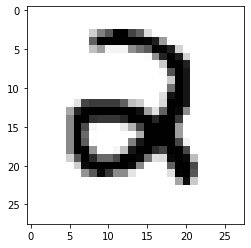

In [9]:
r = random.randint(0, len(x_test)-1) # 0~9999까지 랜덤한 정수
print("Y[%d] : "%r,  y_train[r])
plt.imshow(x_train[r], cmap=plt.cm.gray_r, interpolation = "nearest")

In [10]:
# 데이터 전처리
# Normalizing
# 28x28개의 각 픽셀을 0~255 값으로 구성
x_train, x_test = x_train / 255.0, x_test / 255.0

# (60000, 28, 28) => (60000, 28, 28, 1)로 reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [16]:
# -----------------------
# 모델 생성 및 학습
# -----------------------

model = tf.keras.Sequential([
        # Conv 1
        layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu',
        input_shape=(28,28,1), name='conv1_1'),
        layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', name='conv1_2'),
        layers.MaxPool2D((2,2), padding='same', name='conv1_MaxPool'),
        # Conv 2
        layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', name='conv2_1'),
        layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', name='conv2_2'),
        layers.MaxPool2D((2,2), padding='same', name='conv2_MaxPool'),
        # Conv3
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', name='conv3_1'),
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', name='conv3_2'),
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', name='conv3_3'),
        layers.MaxPool2D((2,2), padding='same', name='conv3_MaxPool'),
        # Conv4
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv4_1'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv4_2'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv4_3'),
        layers.MaxPool2D((2,2), padding='same', name='conv4_MaxPool'),
        # Conv5
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv5_1'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv5_2'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', name='conv5_3'),
        layers.MaxPool2D((2,2), padding='same', name='conv5_MaxPool'),
        # Flatten
        layers.Flatten(),
        # Dropout
        layers.Dropout(0.5),
        # FC1
        layers.Dense(512, activation='relu'),
        # output
        layers.Dense(10, activation='softmax')
])

# model = tf.keras.applications.VGG16()

model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 28, 28, 64)        640       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 28, 28, 64)        36928     
_________________________________________________________________
conv1_MaxPool (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2_MaxPool (MaxPooling2D) (None, 7, 7, 128)         0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 7, 7, 256)        

KeyboardInterrupt: 

In [ ]:
result = model.evaluate(x_test, y_test)
print("최종 예측 성공률(%): ", result[1]*100)

313/313 [==============================] - 5s 15ms/step - loss: 0.0211 - accuracy: 0.9948
최종 예측 성공률(%):  99.47999715805054


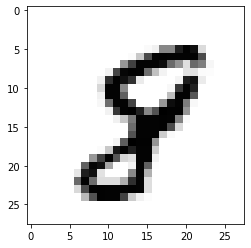

predict: 8
answer: 8


In [ ]:
# -----------------------
# 랜덤으로 숫자 뽑아서 test
# -----------------------

r = random.randint(0, len(x_test)-1) # 0~9999까지 랜덤한 정수
plt.imshow(x_test[r].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
print("predict:", np.argmax(model.predict(x_test[r].reshape((1, 28, 28, 1)))))
print('answer:', np.argmax(y_test[r]))


In [ ]:
# -----------------------
# 오답 샘플 출력
# -----------------------

wrongs = []

for i in range(len(x_test)):
    predict = np.argmax(model.predict(x_test[i].reshape((1, 28, 28, 1))))
    label = np.argmax(y_test[i])
    if predict != label:
        wrongs.append(i)


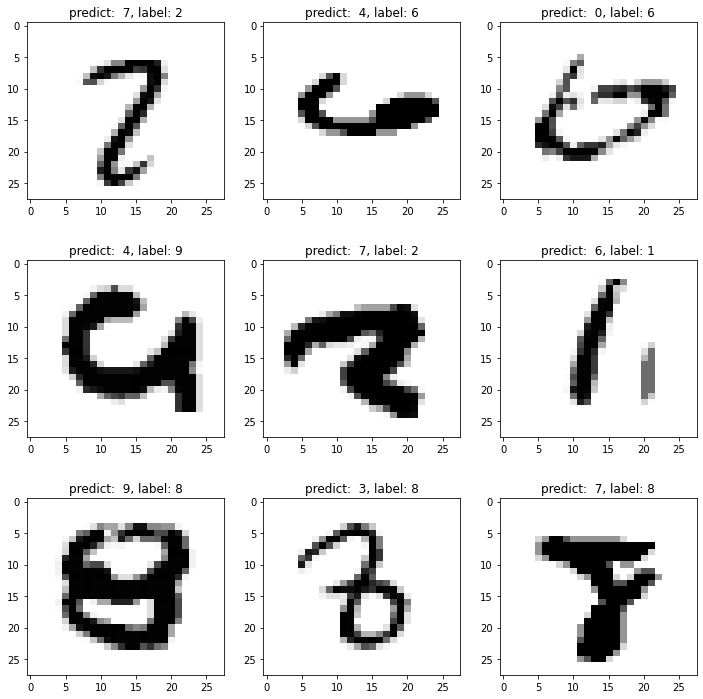

In [ ]:
rows = 3
columns = 3
fig=plt.figure(figsize=(12,12))
axes = []

for i in range(rows * columns):
    r = random.randint(0, len(wrongs)-1)
    predict = np.argmax(model.predict(x_test[wrongs[r]].reshape((1, 28, 28, 1))))
    label = np.argmax(y_test[wrongs[r]])
    img = x_test[wrongs[r]].reshape(28, 28)
    title = 'predict: % d, label: %d'%(predict, label)
    
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.imshow(img, cmap='Greys', interpolation='nearest', aspect='auto')
    ax.set_title(title)


plt.subplots_adjust(hspace=0.35)
# plt.subplots(constrained_layout=True)
plt.show()